In [3]:
import json
import pandas as pd
import gc

with open('C://Users/isang/OneDrive/Desktop/WM/data/WM811K_train_padded_resized_augmented.json', 'r') as f:
  data_aug = json.load(f)

cols = data_aug['columns']

dict_ = dict()

for col in cols:
  dict_[col] = list()

for i in range(len(cols)):
  for j in range(len(data_aug['data'])):
    if i == 0:
      dict_[cols[i]].append(data_aug['data'][j][i])
    elif i == 1:
      dict_[cols[i]].append(data_aug['data'][j][i])

data_aug = pd.DataFrame(dict_)

classes = ["Center", "Donut", "Edge-Loc", "Edge-Ring", "Loc", "Near-full", "Random", "Scratch", "none"]
training_aug = [0] * 9

for i in range(9):
  training_aug[i] = data_aug[data_aug['failureType'] == classes[i]]
  training_aug[i] = training_aug[i].reset_index(drop = True)

del data_aug
del dict_

training_aug[1].head()

,waferMap,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Donut
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Donut
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Donut
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Donut
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Donut


In [6]:
import copy
from PIL import Image
import numpy as np

for i in range(len(training_aug) - 1):
  print(classes[i])
  for j in range(len(training_aug[i]['waferMap'])):
    img = copy.deepcopy(Image.fromarray(np.array(training_aug[i]['waferMap'][j], dtype = np.uint8)))
    horiz_img = img.transpose(method = Image.FLIP_LEFT_RIGHT)
    vert_img = img.transpose(method = Image.FLIP_TOP_BOTTOM)
    rotated_img_1 = img.transpose(method = Image.ROTATE_90)
    rotated_img_2 = img.transpose(method = Image.ROTATE_270)
    training_aug[i].loc[training_aug[i].shape[0]] = [horiz_img, classes[i]]
    training_aug[i].loc[training_aug[i].shape[0]] = [vert_img, classes[i]]
    training_aug[i].loc[training_aug[i].shape[0]] = [rotated_img_1, classes[i]]
    training_aug[i].loc[training_aug[i].shape[0]] = [rotated_img_2, classes[i]]

Center
Donut
Edge-Loc
Edge-Ring
Loc
Near-full
Random
Scratch


In [7]:
for i in range(len(training_aug)):
  print(classes[i])
  for j in range(len(training_aug[i]['waferMap'])):
    training_aug[i]['waferMap'][j] = np.array(training_aug[i]['waferMap'][j])

Center


C:\Users\isang\AppData\Local\Temp\ipykernel_21268\1814120189.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  training_aug[i]['waferMap'][j] = np.array(training_aug[i]['waferMap'][j])


Donut
Edge-Loc
Edge-Ring
Loc
Near-full
Random
Scratch
none


In [8]:
final_train_data = pd.concat([training_aug[0],training_aug[1],training_aug[2],
                              training_aug[3],training_aug[4],training_aug[5],
                              training_aug[6],training_aug[7],training_aug[8]])
del training_aug
gc.collect()
training_aug = pd.DataFrame()
gc.collect()

final_train_data['failureType'] = list(map(lambda x: str(x), final_train_data['failureType']))

parsed = json.loads(final_train_data.to_json(orient = "split"))
del final_train_data
gc.collect()
final_train_data = pd.DataFrame()
gc.collect()

with open('C://Users/isang/OneDrive/Desktop/WM/data/WM811K_final_train.json','w') as f:
    json.dump(parsed, f)
del parsed

## Summary 

In [9]:
with open('C://Users/isang/OneDrive/Desktop/WM/data/WM811K_final_train.json', 'r') as f:
  data = json.load(f)

cols = data['columns']

dict_ = dict()

for col in cols:
  dict_[col] = list()

for i in range(len(cols)):
  for j in range(len(data['data'])):
    if i == 0:
      dict_[cols[i]].append(data['data'][j][i])
    elif i == 1:
      dict_[cols[i]].append(data['data'][j][i])

data = pd.DataFrame(dict_)

failure_types = list(pd.unique(data['failureType']))

print(failure_types)

data.head()

['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full', 'Random', 'Scratch', 'none']


,waferMap,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Center
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Center
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Center
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Center
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Center


In [10]:
types_image_number = list(map(lambda x: (data['failureType']==x).sum(), failure_types))

types_image_proportion = list(map(lambda x: round(x/data.shape[0],3), types_image_number))

print(types_image_number)
print(types_image_proportion)

[17115, 15000, 20170, 38640, 15000, 15000, 15000, 15000, 116022]
[0.064, 0.056, 0.076, 0.145, 0.056, 0.056, 0.056, 0.056, 0.435]


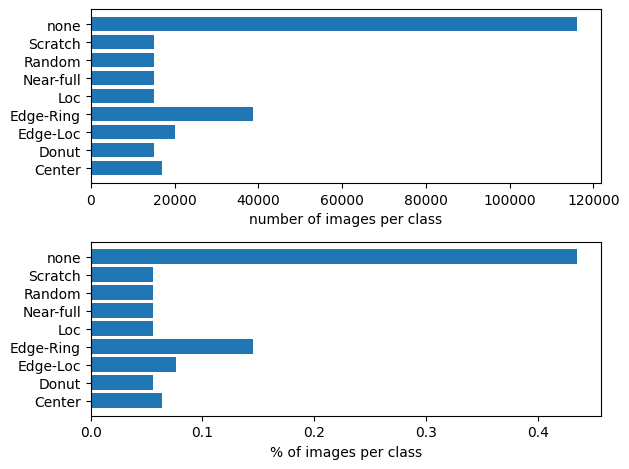

In [11]:
import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.barh(failure_types, types_image_number)
plt.xlabel('number of images per class')

plt.subplot(2,1,2)
plt.barh(failure_types, types_image_proportion)
plt.xlabel('% of images per class')

plt.tight_layout()

<BarContainer object of 2 artists>

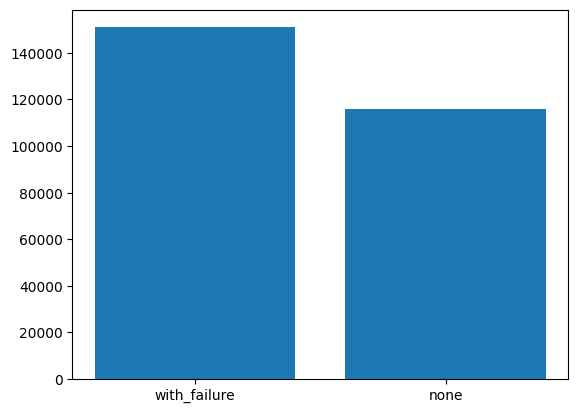

In [12]:
number_failure_images = sum(types_image_number[:8])
number_ok_images = types_image_number[8]

plt.bar(['with_failure','none'],[number_failure_images,number_ok_images])